In [37]:
import pandas as pd
import os
import logging 
import matplotlib.pyplot as plt

In [38]:

# Set up logging
logging.basicConfig(
    filename="datasets.log",  # Log file name
    level=logging.INFO,       # Log level
    format="%(asctime)s - %(levelname)s - %(message)s"
)

# Define the directory containing your datasets
data = r"C:\Users\Hasan\Desktop\week4"

# File names
files = ["store.csv", "test.csv", "train.csv"]

# Read and log datasets
for file in files:
    try:
        file_path = os.path.join(data, file)
        df = pd.read_csv(file_path)  # Read the CSV file
        
        # Log the file name and its contents (first few rows)
        logging.info(f"Contents of {file}:\n{df.head().to_string(index=False)}")
        print(f"{file} processed and logged successfully.")
        # Print the file's head to the console
        print(f"\nContents of {file}:")
        print(df.head())
    except Exception as e:
        # Log any errors that occur during processing
        logging.error(f"Error processing {file}: {e}")
        print(f"Error processing {file}. Check log for details.")
         



store.csv processed and logged successfully.

Contents of store.csv:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     

C:\Users\Hasan\AppData\Local\Temp\ipykernel_8232\2789875488.py:18: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)  # Read the CSV file


In [39]:
# Define the file path
data = r"C:\Users\Hasan\Desktop\week4"
store_file = os.path.join(data, "store.csv")

try:
    # Load the dataset
    store_df = pd.read_csv(store_file)

    # Check for missing values before filling
    print("Missing values before filling:")
    print(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

    # Fill missing values
    store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(store_df['Promo2SinceWeek'].mean())  # Fill with mean
    store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(store_df['Promo2SinceYear'].mean())  # Fill with mean
    store_df['PromoInterval'] = store_df['PromoInterval'].fillna(store_df['PromoInterval'].mode()[0])  # Fill with mode

    # Check for missing values after filling
    print("\nMissing values after filling:")
    print(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

    # Save the cleaned dataset (optional)
    cleaned_file = os.path.join(data, "store_cleaned.csv")
    store_df.to_csv(cleaned_file, index=False)
    print(f"Cleaned data saved to {cleaned_file}")
except Exception as e:
    print(f"Error processing store.csv: {e}")


Missing values before filling:
Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64

Missing values after filling:
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64
Cleaned data saved to C:\Users\Hasan\Desktop\week4\store_cleaned.csv


In [40]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [41]:
# Define dataset directory and file paths
data = r"C:\Users\Hasan\Desktop\week4"
store_file = os.path.join(data, "store.csv")
train_file = os.path.join(data, "train.csv")

# Load datasets
store = pd.read_csv(store_file)
train = pd.read_csv(train_file)

# Merge train and store datasets on 'Store'
df = pd.merge(train, store, on="Store", how="left")

# Preview the merged dataset
print(df.head())


C:\Users\Hasan\AppData\Local\Temp\ipykernel_8232\1619067844.py:8: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(train_file)


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [42]:
#. Preprocess the Data
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract date features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [43]:
# Fill missing CompetitionDistance with median
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# Fill missing categorical columns with 'Unknown'
categorical_cols = ['StoreType', 'Assortment', 'PromoInterval']
for col in categorical_cols:
    df[col] = df[col].fillna('Unknown')


In [44]:
# Define features and target
X = df.drop(columns=['Sales'])
y = df['Sales']


In [45]:
# Identify numeric and categorical columns
numeric_features = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 
                    'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 
                    'Year', 'Month', 'Day', 'Weekday']
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']

# Preprocessing for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_types = set(type(val) for val in df[col].dropna())
        if len(unique_types) > 1:
            print(f"Column '{col}' has mixed types: {unique_types}")


Column 'StateHoliday' has mixed types: {<class 'str'>, <class 'int'>}


In [48]:
df['StateHoliday'] = df['StateHoliday'].astype(str)


In [49]:
# Ensure 'StateHoliday' column is consistent
df['StateHoliday'] = df['StateHoliday'].astype(str)

# If other categorical columns also need type consistency, ensure they are strings:
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']
for col in categorical_features:
    df[col] = df[col].astype(str)


In [50]:
df['StateHoliday'] = df['StateHoliday'].replace({0: 'None'})
df['StateHoliday'] = df['StateHoliday'].astype(str)


In [51]:
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        unique_types = set(type(val) for val in X_train[col].dropna())
        if len(unique_types) > 1:
            print(f"Column '{col}' has mixed types: {unique_types}")


Column 'StateHoliday' has mixed types: {<class 'str'>, <class 'int'>}


In [52]:
# Convert problematic columns to string
problematic_columns = ['StateHoliday']  # Replace with your actual columns
for col in problematic_columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


In [53]:
X_train['StateHoliday'] = X_train['StateHoliday'].replace({0: 'None'})
X_test['StateHoliday'] = X_test['StateHoliday'].replace({0: 'None'})


In [54]:
categorical_features = ['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval']

# Ensure all categorical columns are strings
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


In [55]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and then take the square root to get RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")



RMSE: 1150.9052446043115
R2: 0.9104333532858263


In [57]:
# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=['StoreType', 'Assortment', 'PromoInterval'], drop_first=True)




In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'StateHoliday' column
X_train['StateHoliday'] = label_encoder.fit_transform(X_train['StateHoliday'])


In [59]:
print(X_train.dtypes)


Store                                      int64
DayOfWeek                                  int64
Date                              datetime64[ns]
Customers                                  int64
Open                                       int64
Promo                                      int64
StateHoliday                               int64
SchoolHoliday                              int64
CompetitionDistance                      float64
CompetitionOpenSinceMonth                float64
CompetitionOpenSinceYear                 float64
Promo2                                     int64
Promo2SinceWeek                          float64
Promo2SinceYear                          float64
Year                                       int32
Month                                      int32
Day                                        int32
Weekday                                    int32
StoreType_b                                 bool
StoreType_c                                 bool
StoreType_d         

In [63]:
# Check if there are datetime columns
datetime_columns = X_train.select_dtypes(include=['datetime64']).columns
print("Datetime columns:", datetime_columns)

# Convert datetime columns to numeric features
for col in datetime_columns:
    X_train[col + '_year'] = X_train[col].dt.year
    X_train[col + '_month'] = X_train[col].dt.month
    X_train[col + '_day'] = X_train[col].dt.day
    X_train[col + '_weekday'] = X_train[col].dt.weekday

# Drop original datetime columns
X_train = X_train.drop(columns=datetime_columns)


Datetime columns: Index(['Date'], dtype='object')


In [64]:
# Repeat transformation for X_test
for col in datetime_columns:
    X_test[col + '_year'] = X_test[col].dt.year
    X_test[col + '_month'] = X_test[col].dt.month
    X_test[col + '_day'] = X_test[col].dt.day
    X_test[col + '_weekday'] = X_test[col].dt.weekday

# Drop original datetime columns in X_test
X_test = X_test.drop(columns=datetime_columns)


In [65]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train is your prepared training data and y_train is your target variable
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

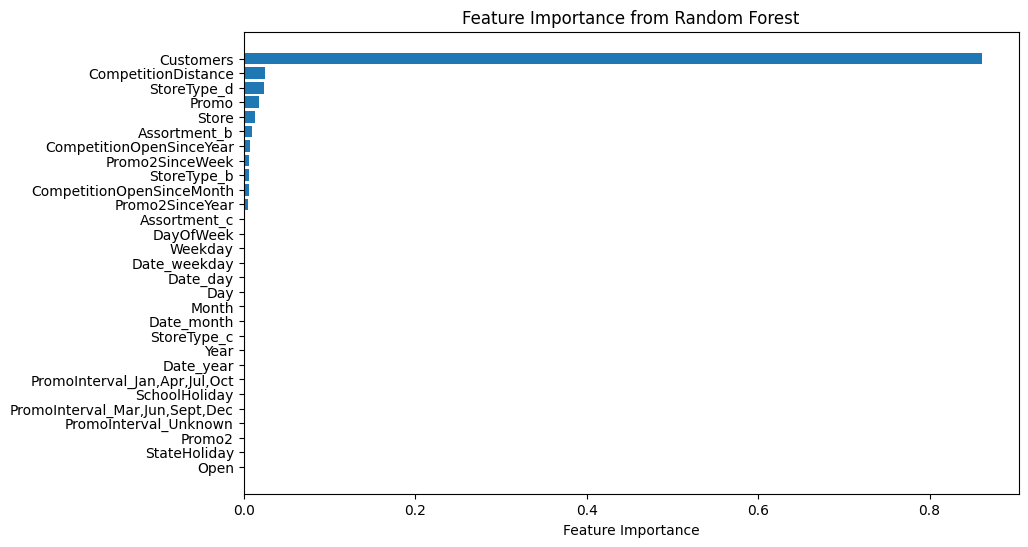

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns  # If X_train is a pandas DataFrame

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from joblib import dump
import numpy as np
from sklearn.model_selection import train_test_split

# Assume X_train and y_train are already prepared

# Sample a subset of data for quicker iteration
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Define the model
model = RandomForestRegressor(random_state=42)

# Define a reduced hyperparameter grid
param_distributions = {
    'n_estimators': [50],               # Fixed smaller number of trees
    'max_depth': [10],                  # Fixed depth for faster training
    'min_samples_split': [2, 5],        # Limited options
    'min_samples_leaf': [1, 2],         
    'max_features': ['sqrt']            # Avoid 'auto' and limit options
}

# Use RandomizedSearchCV for quick hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_distributions, 
    n_iter=5,                           # Fewer random combinations
    cv=2,                               # Reduced cross-validation folds
    scoring='neg_mean_squared_error',    # Evaluation metric
    verbose=1, 
    random_state=42, 
    n_jobs=2                             # Limit parallel jobs
)

# Fit the model on the subset of data
random_search.fit(X_sample, y_sample)

# Output the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", -random_search.best_score_)

# Save the best model
dump(random_search.best_estimator_, 'optimized_random_forest_model_quick.pkl')
print("Model saved as optimized_random_forest_model_quick.pkl")


c:\Users\Hasan\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best score: 1757622.2485147761
Model saved as optimized_random_forest_model_quick.pkl


In [69]:
#for Serialization with Timestamp
from datetime import datetime
# Generate a timestamp for filename
timestamp = datetime.now().strftime('%d-%m-%Y-%H-%M-%S-%f')[:-3]
filename = f"optimized_random_forest_model_{timestamp}.pkl"

# Save the best model with a timestamp
dump(random_search.best_estimator_, filename)
print(f"Model saved as {filename}")

Model saved as optimized_random_forest_model_12-01-2025-11-28-58-530.pkl


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import logging
from datetime import datetime
import os
# Set up logging
logging.basicConfig(
    filename=f'rossmann_model_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logging.info("Started Rossmann LSTM Sales Prediction Process")

# Define dataset directory and file paths
data = r"C:\Users\Hasan\Desktop\week4"
train_file = os.path.join(data, "train.csv")
store_file = os.path.join(data, "store.csv")

logging.info(f"Data directory: {data}")
logging.info(f"Train file: {train_file}")
logging.info(f"Store file: {store_file}")


C:\Users\Hasan\AppData\Local\Temp\ipykernel_11872\1829589142.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_file, parse_dates=['Date'])


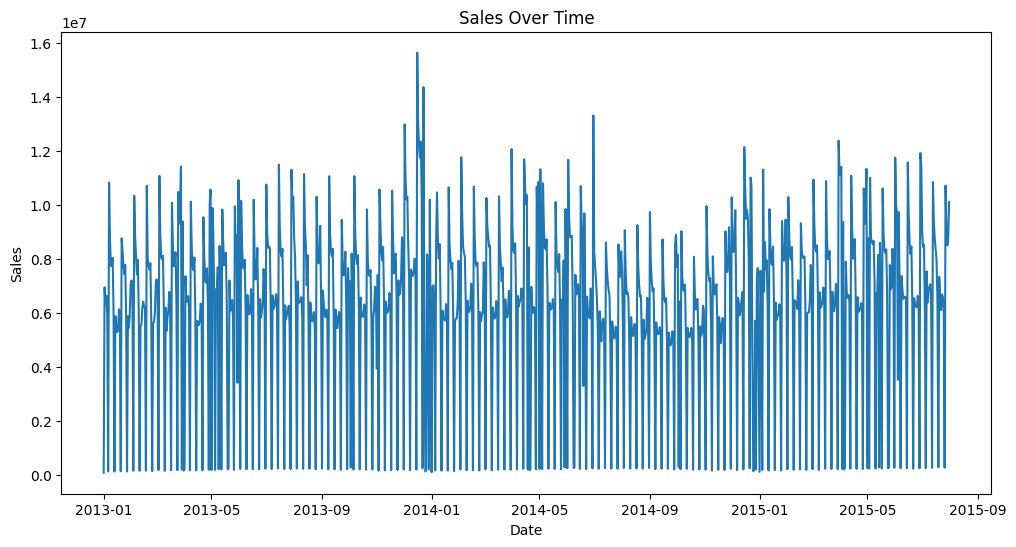

In [12]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Initialize logging
logging.basicConfig(level=logging.INFO)

try:
    # Load train data
    train_data = pd.read_csv(train_file, parse_dates=['Date'])
    
    # Convert 'StateHoliday' to numeric, assuming 0 for non-holiday and 1 for holiday
    train_data['StateHoliday'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
    
    # Group by 'Date' and sum the numeric columns, excluding 'StateHoliday'
    train_data = train_data.groupby('Date').sum().reset_index()

    logging.info("Train data loaded and processed successfully.")
except Exception as e:
    logging.error(f"Failed to load train data: {e}")
    raise

# Plot sales
plt.figure(figsize=(12, 6))
plt.plot(train_data['Date'], train_data['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Check stationarity
result = adfuller(train_data['Sales'])
logging.info(f"ADF Statistic: {result[0]}, p-value: {result[1]}")
if result[1] < 0.05:
    logging.info("Data is stationary.")
else:
    logging.info("Data is not stationary. Applying differencing.")
    train_data['Sales'] = train_data['Sales'].diff().fillna(0)


In [16]:
import numpy as np
def create_supervised_data(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_supervised_data(train_data['Sales'].values, window_size)
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X).reshape((X.shape[0], X.shape[1], 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

logging.info("Data transformed into supervised format.")



In [17]:
#Build and Train LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
logging.info("LSTM model compiled.")

# Train the model
try:
    model.fit(X_scaled, y_scaled, epochs=20, batch_size=32)
    logging.info("Model training completed.")
except Exception as e:
    logging.error(f"Model training failed: {e}")
    raise


c:\Users\Hasan\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.1902
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1622
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1573
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1577
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1465
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1319
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1213
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1173
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1138
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1187
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1046
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0916
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0954
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0915
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0916
Epoc

In [23]:
import tensorflow as tf
from datetime import datetime
import logging
import numpy as np

# Example of generating dummy data for training (replace with your own data)
# X_train should have shape (n_samples, n_timesteps, n_features)
# y_train should have shape (n_samples, n_output)
n_samples = 1000  # Example number of samples
n_timesteps = 10  # Example number of timesteps (sequence length)
n_features = 5    # Example number of features per timestep
n_output = 1      # Example output dimension (e.g., for regression, it could be 1)

X_train = np.random.randn(n_samples, n_timesteps, n_features)
y_train = np.random.randn(n_samples, n_output)

# Ensure logging is set up (optional, but useful for debugging)
logging.basicConfig(level=logging.INFO)

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

# Compile the model (add this step)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20)

# Create the model save path
model_path = f"rossmann_lstm_model_{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.h5"

# Save the model in the HDF5 format (.h5)
try:
    model.save(model_path)
    logging.info(f"Model saved successfully at {model_path}")
except Exception as e:
    logging.error(f"Failed to save model: {e}")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.9432
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9158
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0288
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9161
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0049
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9996
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9218
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9632
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9359
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8988
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9213
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9053
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9552
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9286
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8754
Epoch 16/20
32/32